In [2]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from imblearn.over_sampling import SMOTE
import ast
import pandas as pd
import numpy as np

# from sklearn.datasets import load_digits
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
file_path = r'F:\SKRIPSI\TA\Fix_code\SkripSHYs\FixedDataset\NonAugmented\PerclosEAR\output\PERCLOSready_resampled1.csv'
df = pd.read_csv(file_path)

def convert_to_float_list(column):
    return column.apply(lambda x: list(map(float, ast.literal_eval(x))))

df['PERCLOS'] = convert_to_float_list(df['PERCLOS'])

df['MAR_Std'] = convert_to_float_list(df['MAR_Std'])


# Combine the lists into a single feature matrix
X = np.hstack((np.array(df['PERCLOS'].tolist()), np.array(df['MAR_Std'].tolist())))
y = df['Class'].values

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 100000,activation = 'relu',
                        solver = 'adam')
# Train the model on the training data
mlp.fit(X_train, y_train)
 
# Make predictions on the test data
y_pred = mlp.predict(X_test)
 
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.89


In [8]:
report = classification_report(y_test, y_pred, output_dict=False)
print(report)

              precision    recall  f1-score   support

           1       0.80      0.89      0.84         9
           2       1.00      0.89      0.94         9
           3       0.89      0.89      0.89         9

    accuracy                           0.89        27
   macro avg       0.90      0.89      0.89        27
weighted avg       0.90      0.89      0.89        27



In [9]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[8 0 1]
 [1 8 0]
 [1 0 8]]


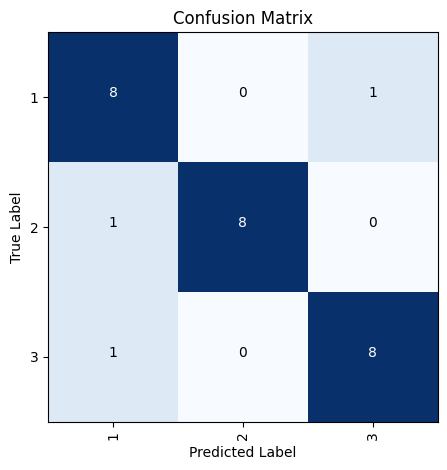

In [10]:
# Definisikan label kelas
import matplotlib.pyplot as plt
class_names = ['1',
                '2',
                '3'
              ]  # Nama kelas

# Tampilkan confusion matrix menggunakan matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
# plt.colorbar()

# Atur label pada sumbu x dan y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Tulis nilai pada setiap sel confusion matrix
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Atur label pada sumbu x dan y
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Tampilkan plot confusion matrix
plt.tight_layout()
plt.show()

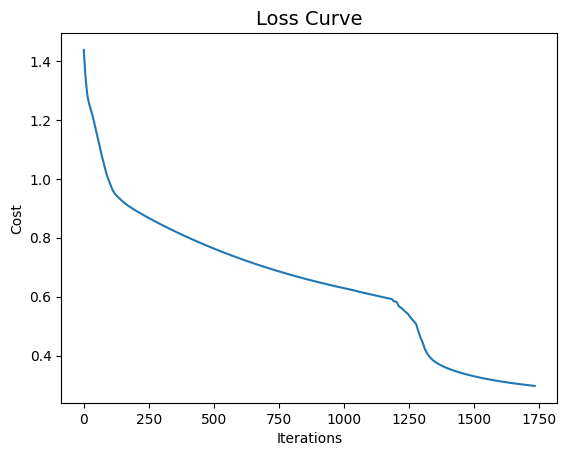

In [11]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()